In [187]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

UC3MAL201 Machine Learning Session 5 Activity sheet 5 Leon Eriksen Helgeland -
First written 31.08.2020

# Classification - Decision Trees

## Objective
The aim of this activity sheet is to load a customer dataset, fit the data, and use KNN to
predict a data point.

In [188]:
dataset_file_name = 'drug200.csv'
dataset_directory = 'dataset'

In [189]:
dataframe = pd.read_csv(f'{dataset_directory}/{dataset_file_name}')
df = dataframe

## 1. Use case scenario and dataset descripton

In today’s scenario you are a medical researcher compiling data for a study. You have
collected data about a set of patients, all of whom suffered from the same illness.
During their course of treatment, each patient responded to one of 5 medications,
Drug A, Drug B, Drug C, Drug X and Drug Y. Part of your job is to build a model to
find out, which drug might be appropriate for a future patient with the same illness.
The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of
patients, and the target is the drug that each patient responded to. It is a sample of
binary classifier, and you can use the training part of the dataset to build a decision
tree, and then use it to predict the class of an unknown patient, or to prescribe it to a
new patient.

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## 2. Basic data processing
### (a) See how many of each class is in the given dataset using visualisation techniques.


In [191]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

In [192]:
counter = 0
for column in df.columns:
    print(f'{counter}: {column}')
    counter+=1

0: Age
1: Sex
2: BP
3: Cholesterol
4: Na_to_K
5: Drug


In [193]:
# Cleaning and preparing dataset

# Set row Sex to binary
df.Sex.replace({'F':0,'M':1}, inplace=True)

# Set row BP to 1-2-3
df.BP.replace({'LOW':1,'NORMAL':2,'HIGH':3}, inplace=True)

# Set row chol to 1-2
df.Cholesterol.replace({'NORMAL':1,'HIGH':2}, inplace=True)
 
# Binaryize target
Drugz = pd.get_dummies(df['Drug'],drop_first=False)
df = df.drop('Drug', axis=1)
df = pd.concat([df, Drugz], axis=1)

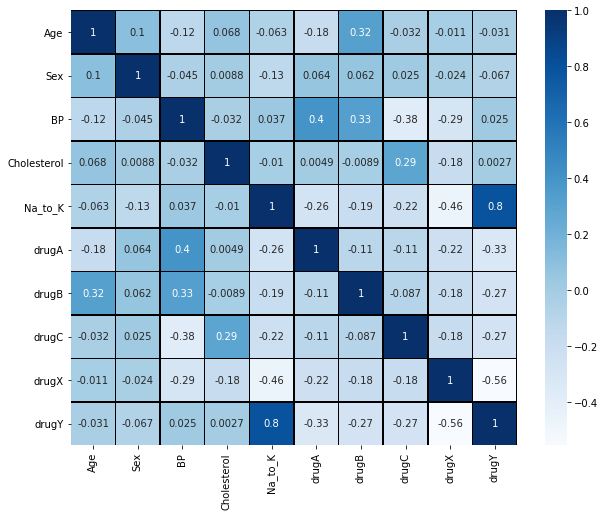

In [194]:
# some exploration
# 1 - Correlation of original dataframe
correlation = df.corr()
plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, linecolor='black', linewidth=0.5, annot=True, cmap='Blues')

### (b) Define feature set.

In [195]:
y = df[['drugA','drugB','drugC','drugX','drugY']] 
X = df[['Age','Sex','BP','Cholesterol']] 

### (c) Perform z-score standardisation.

In [196]:
data = X
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(data)
print(scaled_data)
X = scaled_data

Age  Sex  BP  Cholesterol
0     23    0   3            2
1     47    1   1            2
2     47    1   1            2
3     28    0   2            2
4     61    0   1            2
..   ...  ...  ..          ...
195   56    0   1            2
196   16    1   1            2
197   52    1   2            2
198   23    1   2            1
199   40    0   1            1

[200 rows x 4 columns]
[[-1.29159102 -1.040833    1.11692063  0.97043679]
 [ 0.16269866  0.96076892 -1.2722144   0.97043679]
 [ 0.16269866  0.96076892 -1.2722144   0.97043679]
 [-0.988614   -1.040833   -0.07764689  0.97043679]
 [ 1.0110343  -1.040833   -1.2722144   0.97043679]
 [-1.35218642 -1.040833   -0.07764689  0.97043679]
 [ 0.28388946 -1.040833   -0.07764689  0.97043679]
 [-0.20087376  0.96076892 -1.2722144   0.97043679]
 [ 0.9504389   0.96076892 -0.07764689  0.97043679]
 [-0.07968296  0.96076892 -1.2722144  -1.03046381]
 [ 0.16269866 -1.040833   -1.2722144   0.97043679]
 [-0.62504158 -1.040833    1.11692063 -1.0304638

### (d) Using scikit-learn perform train-test split.

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Kick start KNN
Develop a classifier using K = 3 and check the accuracy of your classifier using the
testing dataset. You can use either of the discussed model evaluation matrices
however, Jaccard similarity index is preferred. Repeat all the steps under this task by
substituting K = 5.

In [198]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
neigh.score(X_test, y_test)

0.8

In [199]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X, y)
neigh.score(X_test, y_test)

0.7333333333333333

## 4. Which is the optmal value of K?
Develop a loop wherein you can evaluate the accuracy of your KNN classifier starting
from K = 1 until K = 10. You are required to calculate the model accuracy at every
step.

In [200]:
k_list = []
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X, y)
    accuracy = neigh.score(X_test, y_test)
    k_list.append(accuracy)
    print(f'K = {i} : {accuracy}')

K = 1 : 0.9333333333333333
K = 2 : 0.5666666666666667
K = 3 : 0.8
K = 4 : 0.55
K = 5 : 0.7333333333333333
K = 6 : 0.5333333333333333
K = 7 : 0.6833333333333333
K = 8 : 0.38333333333333336
K = 9 : 0.5833333333333334
K = 10 : 0.38333333333333336


## 5. Visualisaton of model accuracy
Plot the model accuracy for the different values of K. Purpose of this task is to
visualise the comparison among the various neighbours, as performed in the above
task.

([<matplotlib.axis.XTick at 0x2c00767a088>,
 <a list of 10 Text xticklabel objects>)

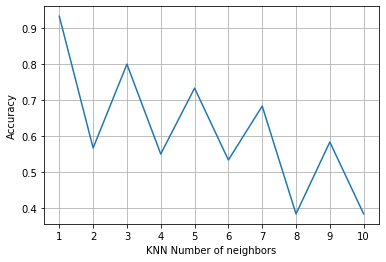

In [202]:
plt.plot(k_list)
plt.ylabel('Accuracy')
plt.xlabel('KNN Number of neighbors')
plt.grid()
plt.xticks([0,1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9,10])